In [1]:
# Reading in neccessary packages
import pandas as pd
import numpy as np
from project_functions.analysis_functions import plot, mse, transform, saveModel, loadModel, modelTraining, createUsableDF, score, boostModel

# This package only neccessary if you would like to re-download the data int the nexyt
# import yahoo_finance as yf

In [2]:
# object = yf.Ticker('F')
# data = object.history(start="2000-01-01", end="2020-11-17")
# data.to_csv('Data/Raw Data/ford.csv')
data = pd.read_csv('Data/Raw Data/ford.csv', index_col='Date')



In [3]:
# This defines the numpy of days in the past we will use to predict the current price
LAG = 40

In [4]:
xTrain, yTrain, xTest, yTest, scaler = transform(data, LAG)

In [5]:
# model = modelTraining(2000, 10)
# saveModel(model, "fordRealModel", location='Data/Final Models')
model = loadModel(name="fordModel", location='Data/Final Models')

MSE Train: 0.036685054481435164
MSE Test: 0.04465529080516649


C:\Users\Aidan\Documents\GitRepositories\cmpt-353-stock-market-predictor\project_functions\analysis_functions.py:211: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


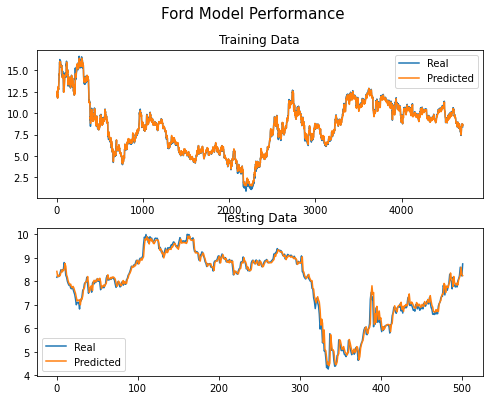

In [6]:
mseTrain, trainPreds, trainTruth = mse(xTrain,yTrain, model, scaler)
print("MSE Train:", mseTrain)

mseTest, testPreds, testTruth = mse(xTest,yTest, model, scaler)

print("MSE Test:", mseTest)

plot(trainTruth, trainPreds, testTruth, testPreds, 'Ford Model Performance')

Looking at the above results, we can see that the model appears to perform very well, in fact it appears to perform about as good as Fordward Industries before we boosted it.  Lets see how often we guess correctly.

In [7]:
tradingActionsTrain, tradingActionsTest = createUsableDF(data,scaler, model)

In [8]:
print("Training Score:", score(tradingActionsTrain.copy()))
print("Test Score:", score(tradingActionsTest.copy()))

Training Score: 0.5056251326682233
Test Score: 0.5079681274900398


We can see that we are essentially guessing at this point on the training data.  Lets see if we can boost it.

In [9]:
boostModel(tradingActionsTrain, tradingActionsTest)

,Open,residuals,predicted,tomorrow,action,movingResidual,predictedTomorrow
Date,,,,,,,
2018-11-19,8.172262,0.249298,8.421559,8.199216,buy,-0.028064,8.227280
2018-11-20,8.244742,-0.045527,8.199216,8.259802,buy,-0.024974,8.284776
2018-11-21,8.199443,0.060359,8.259802,8.225658,buy,-0.025711,8.251370
2018-11-23,8.217563,0.008096,8.225658,8.242466,buy,-0.024654,8.267120
2018-11-26,8.362524,-0.120058,8.242466,8.371856,buy,-0.024542,8.396398
...,...,...,...,...,...,...,...
2020-11-10,8.230000,-0.076082,8.153917,8.258626,sell,0.071415,8.187211
2020-11-11,8.600000,-0.341374,8.258626,8.596163,sell,0.068932,8.527231
2020-11-12,8.260000,0.336163,8.596163,8.292694,sell,0.065816,8.226878


In [10]:
print(score(tradingActionsTest))

0.5298804780876494


Boosting the model appear to improve our predictions by about 2 percent.

In [12]:
tradingActionsFinal = tradingActionsTest[['Open', 'predictedTomorrow', 'action']]
tradingActionsFinal = tradingActionsFinal.rename(columns={'action':'predictedAction'})
tradingActionsFinal['predicted'] = tradingActionsFinal['predictedTomorrow'].shift(1)
tradingActionsFinal['stock'] = 'ford'
tradingActionsFinal

,Open,predictedTomorrow,predictedAction,predicted,stock
Date,,,,,
2018-11-19,8.172262,8.227280,buy,NaN,ford
2018-11-20,8.244742,8.284776,buy,8.227280,ford
2018-11-21,8.199443,8.251370,buy,8.284776,ford
2018-11-23,8.217563,8.267120,buy,8.251370,ford
2018-11-26,8.362524,8.396398,buy,8.267120,ford
...,...,...,...,...,...
2020-11-10,8.230000,8.187211,sell,8.082057,ford
2020-11-11,8.600000,8.527231,sell,8.187211,ford
2020-11-12,8.260000,8.226878,sell,8.527231,ford


In [13]:
tradingActionsFinal.to_csv('Data/Final Predictions/fordComplete.csv')